# WeatherPy

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#Empty Lists
x=1
count=1
city_df=[]
lat=[] 
long=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]


#Base line information
url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="
city_responses= [ ]

#Beggining Print
print("Beginning Data Retrieval")
print("------------------------")

#for loop to make a api request for each city. 
for city in cities:
    if x >= 51: 
        count+= 1
        x=1
    try:
        city_data=requests.get(url + city).json()
        city_df.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']["humidity"])
        Cloudiness.append(city_data["clouds"]['all'])
        Wind_Speed.append(city_data["wind"]['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        city_responses.append(city_data)
        print(f"Processing Record {x} of set {count}|{city}")
        x+=1
    except: 
        print("City not found. Skipping... ")
        
#Final Print
print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1|cherskiy
Processing Record 2 of set 1|rikitea
Processing Record 3 of set 1|yarensk
Processing Record 4 of set 1|punta arenas
Processing Record 5 of set 1|flinders
Processing Record 6 of set 1|vaini
Processing Record 7 of set 1|la ronge
City not found. Skipping... 
Processing Record 8 of set 1|dikson
Processing Record 9 of set 1|patharia
Processing Record 10 of set 1|batemans bay
Processing Record 11 of set 1|jamestown
Processing Record 12 of set 1|zlobin
Processing Record 13 of set 1|castro
Processing Record 14 of set 1|severo-kurilsk
Processing Record 15 of set 1|ushuaia
Processing Record 16 of set 1|csabrendek
Processing Record 17 of set 1|iqaluit
Processing Record 18 of set 1|salamanca
Processing Record 19 of set 1|bambous virieux
Processing Record 20 of set 1|nikolskoye
Processing Record 21 of set 1|iturama
Processing Record 22 of set 1|qaanaaq
Processing Record 23 of set 1|barvinkove
City not found. Ski

Processing Record 43 of set 4|impfondo
Processing Record 44 of set 4|yumen
Processing Record 45 of set 4|barrow
Processing Record 46 of set 4|padang
Processing Record 47 of set 4|nosy varika
City not found. Skipping... 
Processing Record 48 of set 4|yar-sale
Processing Record 49 of set 4|pacific grove
Processing Record 50 of set 4|college
Processing Record 1 of set 5|rabat
Processing Record 2 of set 5|santa fe
Processing Record 3 of set 5|aksu
Processing Record 4 of set 5|upernavik
Processing Record 5 of set 5|jalu
Processing Record 6 of set 5|agadir
City not found. Skipping... 
Processing Record 7 of set 5|thompson
Processing Record 8 of set 5|beira
Processing Record 9 of set 5|peniche
Processing Record 10 of set 5|necochea
Processing Record 11 of set 5|ponta do sol
Processing Record 12 of set 5|beloha
Processing Record 13 of set 5|saint george
Processing Record 14 of set 5|zhuanghe
Processing Record 15 of set 5|bluff
Processing Record 16 of set 5|blyth
Processing Record 17 of set 5|i

Processing Record 44 of set 8|hofn
Processing Record 45 of set 8|conde
City not found. Skipping... 
Processing Record 46 of set 8|erdenet
Processing Record 47 of set 8|aswan
Processing Record 48 of set 8|clyde river
Processing Record 49 of set 8|nizwa
Processing Record 50 of set 8|olafsvik
Processing Record 1 of set 9|tripoli
Processing Record 2 of set 9|grand gaube
Processing Record 3 of set 9|vila velha
Processing Record 4 of set 9|ust-kuyga
Processing Record 5 of set 9|gorele
Processing Record 6 of set 9|bansang
Processing Record 7 of set 9|port-gentil
Processing Record 8 of set 9|dingle
Processing Record 9 of set 9|murygino
Processing Record 10 of set 9|chanika
Processing Record 11 of set 9|lexington
Processing Record 12 of set 9|ulagan
Processing Record 13 of set 9|macklin
Processing Record 14 of set 9|swansea
Processing Record 15 of set 9|simoes
City not found. Skipping... 
Processing Record 16 of set 9|evensk
Processing Record 17 of set 9|misratah
Processing Record 18 of set 9|s

# Convert Raw Data to DataFrame

Export the city data into a .csv

Display the DataFrame

In [27]:
#Make into a DataFrame

main_df=pd.DataFrame({"City": city_df, "Lat": lat, "Lng": long, 
                      "Max Temp": Max_Temp, "Humidity": Humidity, 
                      "Cloudiness":Cloudiness, "Wind Speed": Wind_Speed,
                     "Country": Country, "Date": Date})

main_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [32]:
#Count each column to ensure that they are equal

main_df.head(5)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.75,161.30,48.70,76,100,3.67,RU,1596672432
1,Rikitea,-23.12,-134.97,70.54,75,67,9.48,PF,1596672436
2,Yarensk,62.17,49.09,59.41,87,96,6.69,RU,1596672820
3,Punta Arenas,-53.15,-70.92,37.40,74,100,23.04,CL,1596672450
4,Flinders,-34.58,150.86,50.00,46,0,10.29,AU,1596672577


In [33]:
#Export the city data into a .csv

main_df.to_csv("../output_data/city_data.csv", encoding="utf-8", index=False)



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
#There is no data where humidity is over 100%
main_df["Humidity"].max()



100

In [36]:
# Export the City_Data into a csv

main_df.to_csv("../output_data/clean_city_data.csv", encoding="utf-8", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

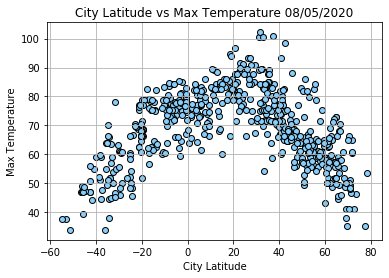

In [37]:
#New (x,y) Variables
latitude=main_df["Lat"]
Max_T=main_df["Max Temp"]

#Making Scatter Plot
plt.scatter(latitude, Max_T, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Max Temperature 08/05/2020")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

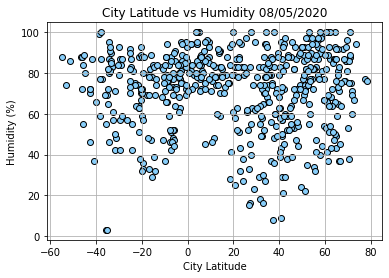

In [38]:
#New (y) variable
Humidity_data=main_df["Humidity"]

#Making Scatter Plot
plt.scatter(latitude, Humidity_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Humidity 08/05/2020")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")

#Saving the graph to a PNG
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

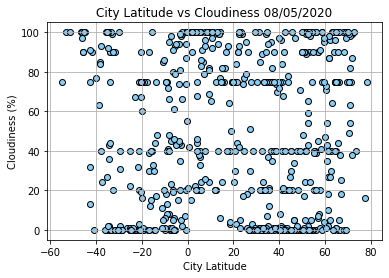

In [39]:
#New (y) variable
Cloud_data=main_df["Cloudiness"]

#Making Scatter Plot
plt.scatter(latitude, Cloud_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Cloudiness 08/05/2020")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

#Saving the graph to a PNG
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

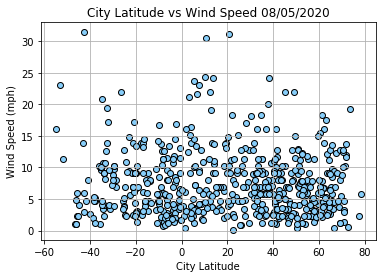

In [40]:
#New (y) variable
Wind_data=main_df["Wind Speed"]

#Making Scatter Plot
plt.scatter(latitude, Wind_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Wind Speed 08/05/2020")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df=main_df[main_df["Lat"]>0]
Southern_df=main_df[main_df["Lat"]<0]

In [41]:
#Practice
def plot_linear_regression(x,y,title,text_coordinates):
    (slope, intercept,rvalue, pvalue, stderr)= linregress(x,y)
    regress_values= x*slope + intercept
    line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x, y, marker="o", facecolors="lightskyblue", edgecolors="black")
    plt.plot(x, regress_values, color='red')
    plt.annotate(line_eq, text_coordinates, color='red', fontsize= 14)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

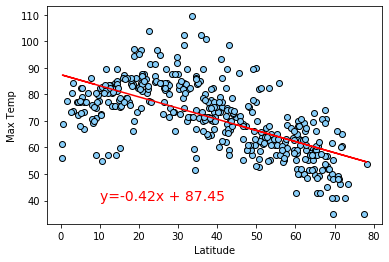

The r-squared is: 0.426658269395955


In [51]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Max Temp"], "Max Temp",(10,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

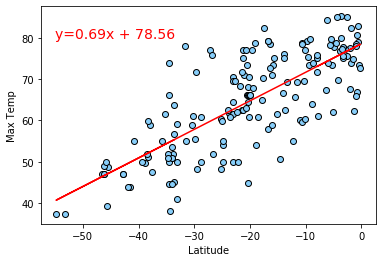

The r-squared is: 0.5922163233316483


In [53]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Max Temp"], "Max Temp",(-55,80))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

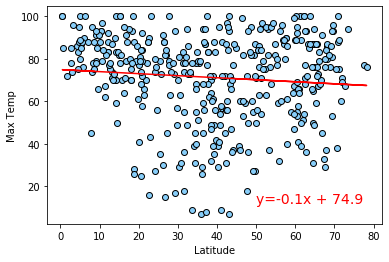

The r-squared is: 0.008456003553458564


In [44]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Humidity"], "Max Temp",(50,12))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

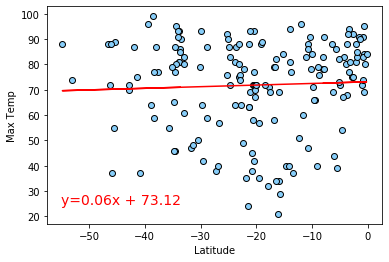

The r-squared is: 0.002232413082077866


In [54]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Humidity"], "Max Temp",(-55,25))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

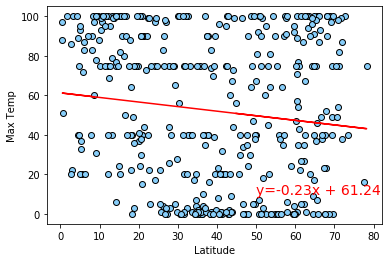

The r-squared is: 0.015477729299929204


In [55]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Cloudiness"], "Max Temp",(50,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

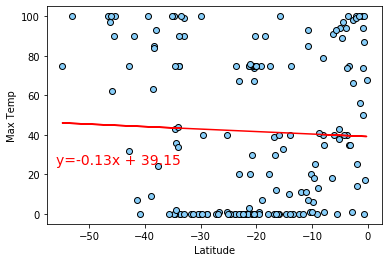

The r-squared is: 0.0018510966477850222


In [47]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Cloudiness"], "Max Temp",(-56,25))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

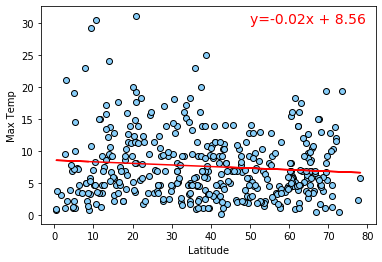

The r-squared is: 0.009297224479627518


In [57]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Wind Speed"], "Max Temp",(50,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

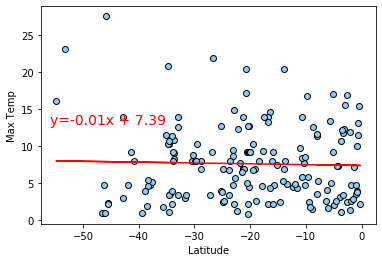

The r-squared is: 0.0008960090925743288


In [49]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Wind Speed"], "Max Temp",(-56,13))

# Analysis

The highest temperatures in the world seem to be located around latitude 20 (near 0) since long sun exposure. 

The northern hemisphere max temp is higher than sourthern hemisphere max temp since the highest temperatures in the world seem to be located around latitude 20.

There is a little correlation between the cities geolocation and the amount of humidity it receives, and also the cloudiness.

